In [1]:
import pandas as pd
import numpy as np

In [2]:
# parse_date : date time을 년/월/일/시/분/초 로 read_csv 할 때부터 나눌 수 있게끔 해주는 것.
train = pd.read_csv("bike/train.csv", parse_dates = ["datetime"])

# train["datetime"].dt.year (month / day / hour / minute / second)

print(train.shape)
train.head()

# 우리가 맞춰야 하는 건 count, casual(비회원 대여량), registered(회원 대여량)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("bike/test.csv", parse_dates = ["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
print(train["datetime"].dtypes)
train["datetime_year"] = train["datetime"].dt.year
train["datetime_month"] = train["datetime"].dt.month
train["datetime_day"] = train["datetime"].dt.day
train["datetime_hour"] = train["datetime"].dt.hour
train["datetime_minute"] = train["datetime"].dt.minute
train["datetime_second"] = train["datetime"].dt.second
train["datetime_dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train.head()
# train[["datetime", "datetime_year", "datetime_hour"]].head()

datetime64[ns]
(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [5]:
test["datetime_year"] = test["datetime"].dt.year
test["datetime_month"] = test["datetime"].dt.month
test["datetime_day"] = test["datetime"].dt.day
test["datetime_hour"] = test["datetime"].dt.hour
test["datetime_minute"] = test["datetime"].dt.minute
test["datetime_second"] = test["datetime"].dt.second
test["datetime_dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime_year", "datetime_month", "datetime_day", "datetime_hour", "datetime_minute", "datetime_second"]].head()

(6493, 16)


,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


In [6]:
train["season_1"] = train["season"] == 1
train["season_2"] = train["season"] == 2
train["season_3"] = train["season"] == 3
train["season_4"] = train["season"] == 4

test["season_1"] = test["season"] == 1
test["season_2"] = test["season"] == 2
test["season_3"] = test["season"] == 3
test["season_4"] = test["season"] == 4

train["weather_1"] = train["weather"] == 1
train["weather_2"] = train["weather"] == 2
train["weather_3"] = train["weather"] == 3
train["weather_4"] = train["weather"] == 4

test["weather_1"] = test["weather"] == 1
test["weather_2"] = test["weather"] == 2
test["weather_3"] = test["weather"] == 3
test["weather_4"] = test["weather"] == 4

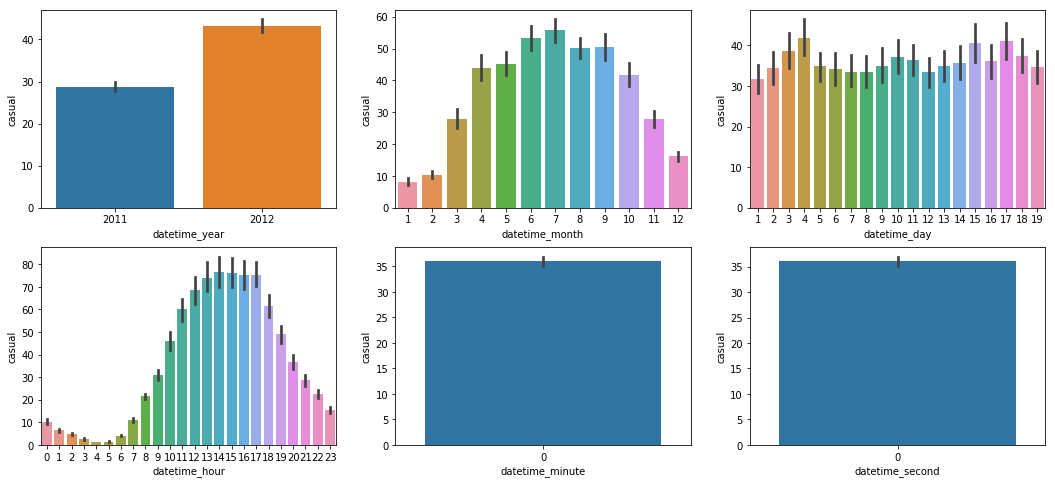

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18, 8)

sns.barplot(data = train, x = "datetime_year", y = "casual", ax=ax1)
sns.barplot(data = train, x = "datetime_month", y = "casual", ax=ax2)
sns.barplot(data = train, x = "datetime_day", y = "casual", ax=ax3)
sns.barplot(data = train, x = "datetime_hour", y = "casual", ax=ax4)
sns.barplot(data = train, x = "datetime_minute", y = "casual", ax=ax5)
sns.barplot(data = train, x = "datetime_second", y = "casual", ax=ax6)

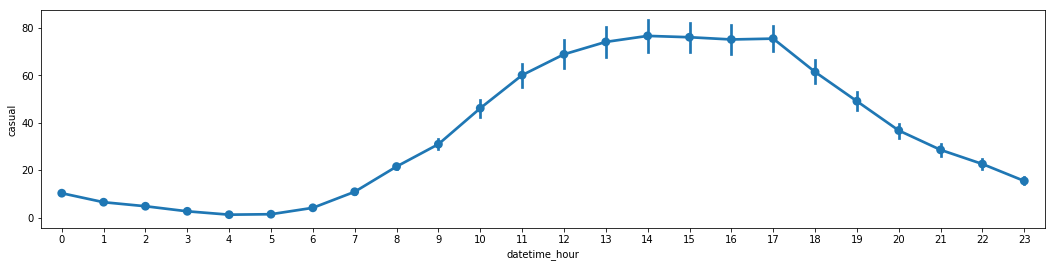

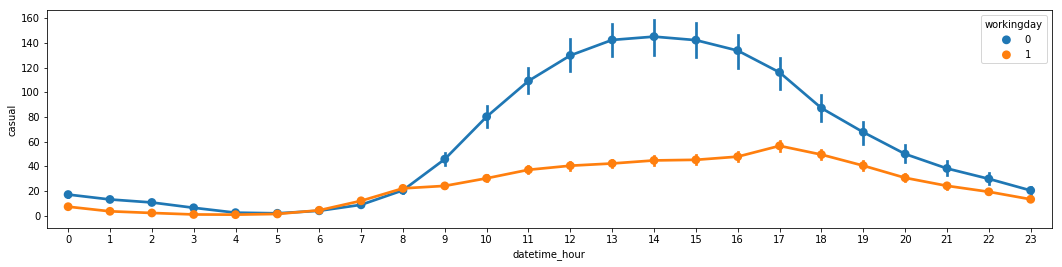

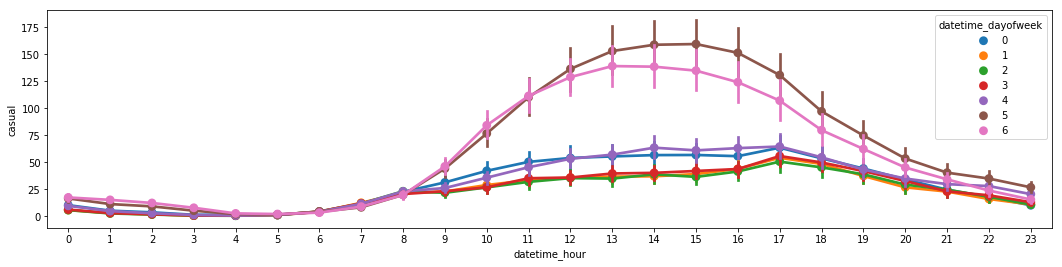

In [8]:
figure, ax1 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18, 4)

sns.pointplot(data = train, x = "datetime_hour", y = "casual", ax = ax1)

figure, ax2 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18, 4)

sns.pointplot(data = train, x = "datetime_hour", y = "casual", hue = "workingday", ax = ax2)

figure, ax3 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18, 4)

sns.pointplot(data = train, x = "datetime_hour", y = "casual", hue = "datetime_dayofweek", ax = ax3)

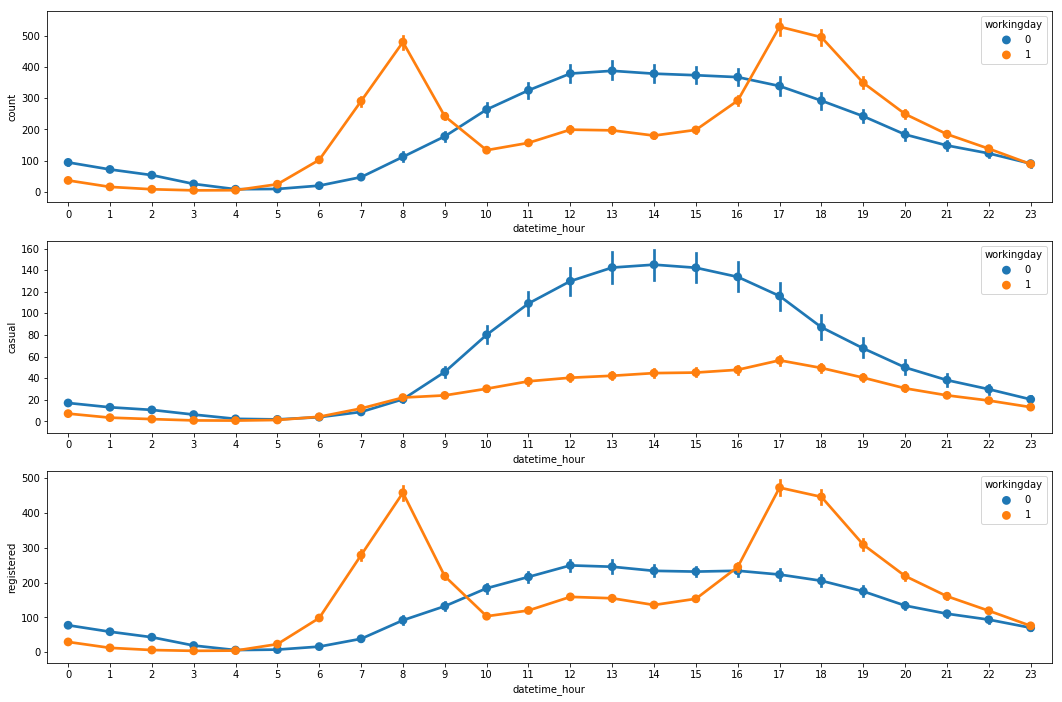

In [9]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 12)

sns.pointplot(data=train, x="datetime_hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime_hour", y="casual", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime_hour", y="registered", hue="workingday", ax=ax3)

In [10]:
def concatenate_year_month(datetime) :
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime_year_month"] = train["datetime"].apply(concatenate_year_month)
# .apply : for문 대신해서 생긴 것이라 생각하면 되고, 10886개의 data가 함수의 변수로 들어가는 것.
print(type(train["datetime"]))
print(train["datetime"].dtypes)
print(train.shape)
train[["datetime", "datetime_year_month"]].head()

<class 'pandas.core.series.Series'>
datetime64[ns]
(10886, 28)


,datetime,datetime_year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


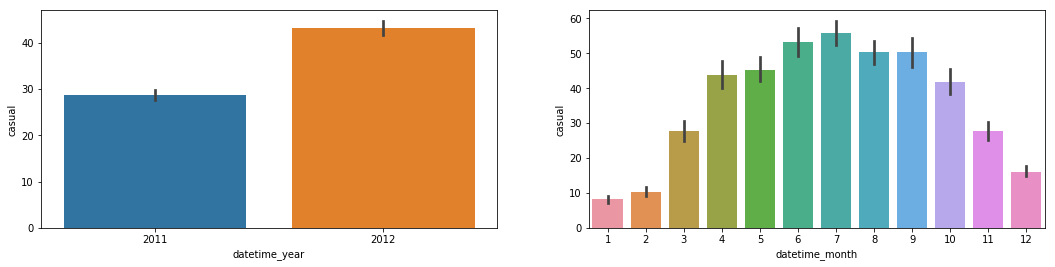

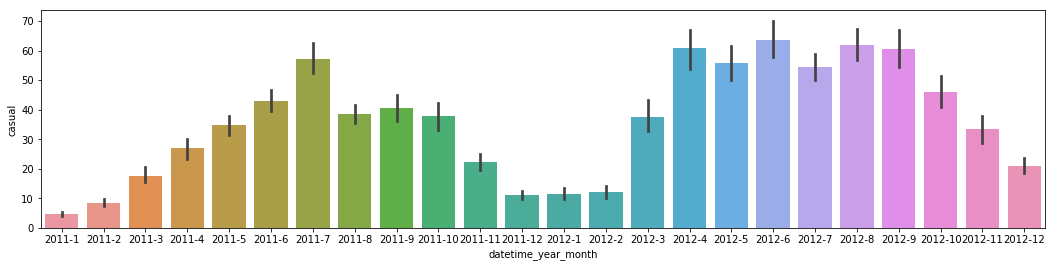

In [11]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime_year", y="casual", ax=ax1)
sns.barplot(data=train, x="datetime_month", y="casual", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime_year_month", y="casual", ax=ax3)

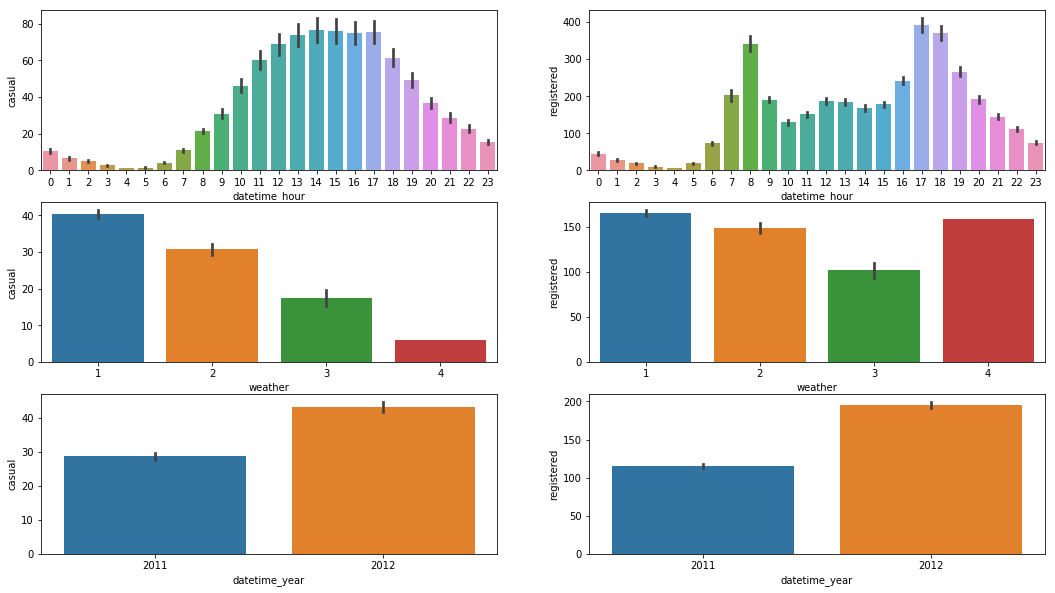

In [12]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2)
figure.set_size_inches(18, 10)

sns.barplot(data = train, x = "datetime_hour", y = "casual", ax=ax1)
sns.barplot(data = train, x = "datetime_hour", y = "registered", ax=ax2)
sns.barplot(data = train, x = "weather", y = "casual", ax=ax3)
sns.barplot(data = train, x = "weather", y = "registered", ax=ax4)
sns.barplot(data = train, x = "datetime_year", y = "casual", ax=ax5)
sns.barplot(data = train, x = "datetime_year", y = "registered", ax=ax6)

In [13]:
feature_names = [
    "season", 
    "weather", 
    "holiday", "workingday", 
    "temp", "atemp", "humidity",
    "datetime_year", "datetime_hour", "datetime_dayofweek"
]

feature_names

['season',
 'weather',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'datetime_year',
 'datetime_hour',
 'datetime_dayofweek']

In [14]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 10)


,season,weather,holiday,workingday,temp,atemp,humidity,datetime_year,datetime_hour,datetime_dayofweek
0,1,1,0,0,9.84,14.395,81,2011,0,5
1,1,1,0,0,9.02,13.635,80,2011,1,5
2,1,1,0,0,9.02,13.635,80,2011,2,5
3,1,1,0,0,9.84,14.395,75,2011,3,5
4,1,1,0,0,9.84,14.395,75,2011,4,5


In [15]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 10)


,season,weather,holiday,workingday,temp,atemp,humidity,datetime_year,datetime_hour,datetime_dayofweek
0,1,1,0,1,10.66,11.365,56,2011,0,3
1,1,1,0,1,10.66,13.635,56,2011,1,3
2,1,1,0,1,10.66,13.635,56,2011,2,3
3,1,1,0,1,10.66,12.880,56,2011,3,3
4,1,1,0,1,10.66,12.880,56,2011,4,3


In [16]:
lable_name = "casual"

Y_train = train[lable_name]

print(Y_train.shape)
Y_train.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 2)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [18]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    square_difference = difference ** 2
    mean_square_difference = square_difference.mean()
    
    score = np.sqrt(mean_square_difference)
    
    return score

print(rmsle([1, 2, 3], [1, 2, 3]))
print(rmsle([1, 2, 3], [2, 3, 4]))
print(rmsle([1, 2, 3], [1, 4, 9]))

rmsle_score = make_scorer(rmsle)
rmsle_score

0.0
0.31461933252553237
0.6056763501008297


make_scorer(rmsle)

In [19]:
from sklearn.model_selection import cross_val_score

# score = cross_val_score(model, X_train, Y_train,
#                         cv = 20, scoring = "neg_mean_absolute_error").mean() # cv : 조각 개수

# score = -1.0 * score

score = cross_val_score(model, X_train, Y_train, cv=20, scoring=rmsle_score).mean()

print("Score = {0:.5f}".format(score))

Score = 0.61958


In [20]:
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [21]:
model.predict(X_test)

array([1.8, 0.5, 0.9, ..., 3.3, 3. , 2. ])

In [22]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions

(6493,)


array([1.8, 0.5, 0.9, ..., 3.3, 3. , 2. ])

In [23]:
submission = pd.read_csv("kaggle_bike/sampleSubmission.csv")

print(submission.shape)
submission.head()

FileNotFoundError: File b'kaggle_bike/sampleSubmission.csv' does not exist

In [ ]:
submission["count"] = predictions

print(submission.shape)
submission.head()

In [ ]:
submission.to_csv("kaggle_bike/result_casual.csv", index = False)